# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [1]:
! git clone https://github.com/DS3001/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 34 (delta 4), reused 1 (delta 1), pack-reused 23
Receiving objects: 100% (34/34), 7.18 MiB | 13.74 MiB/s, done.
Resolving deltas: 100% (7/7), done.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns



In [12]:
#1
data = pd.read_csv('/content/visualization/assignment/data/college_completion.csv')

#2
data.head(5)




,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [13]:
#2.1
print(len(data))

3798


2: There are 3798 observations present in the dataset. The dataset includes aspects like the college attended, location of the college (in city and state), level accomplished, and other factors like information about the college (basic info, hbcu status, class sizes, location, nicknames, and other information. For the attendees themselves (the actual observations)bit covers info about transfers that might have taken place.

In [15]:
#3
pd.crosstab(data['control'],data['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


3. 4 year colleges make up the majority of colleges. In this category, the majority are private not-for-profits (1180 total), almost doubling the number of both for-profit and public 4 year schools (527 and 632 respectively). The second most numerous is public, two-year schools. The not for profit type is quite uncommon at the 2 year level, a trend not exhibited for the other types.

<Axes: xlabel='grad_100_value', ylabel='Count'>

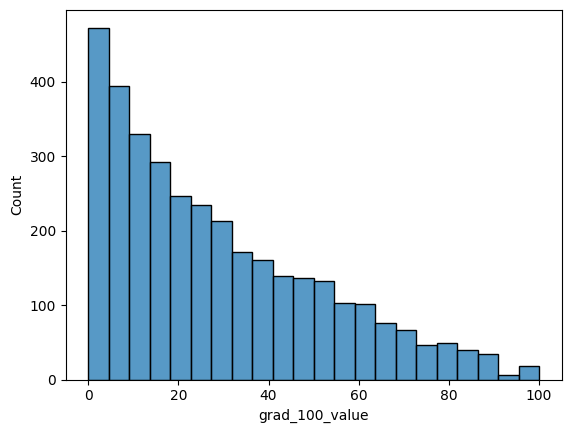

In [17]:
#4
sns.histplot(data['grad_100_value'])

<Axes: xlabel='grad_100_value', ylabel='Density'>

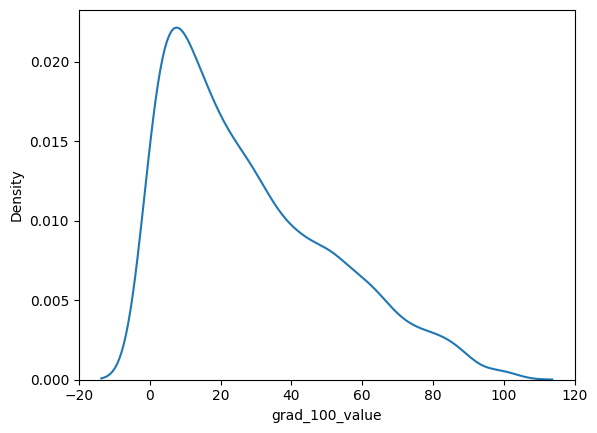

In [18]:
#4.1
sns.kdeplot(data['grad_100_value'])

<Axes: ylabel='grad_100_value'>

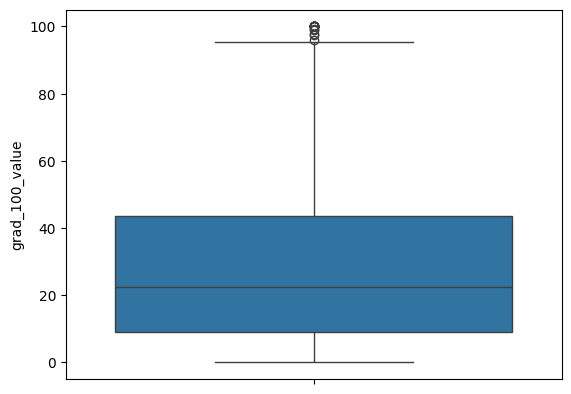

In [19]:
#4.2
sns.boxplot(data['grad_100_value'])

In [20]:
#4.3
data['grad_100_value'].describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

<Axes: xlabel='grad_100_value', ylabel='Density'>

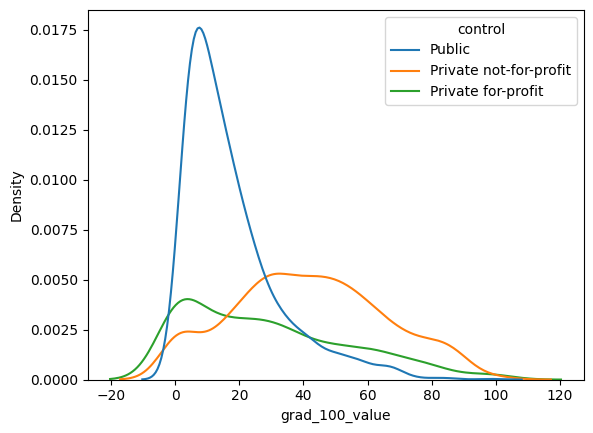

In [21]:
#5
sns.kdeplot(data, x='grad_100_value', hue='control')

<Axes: xlabel='grad_100_value', ylabel='Density'>

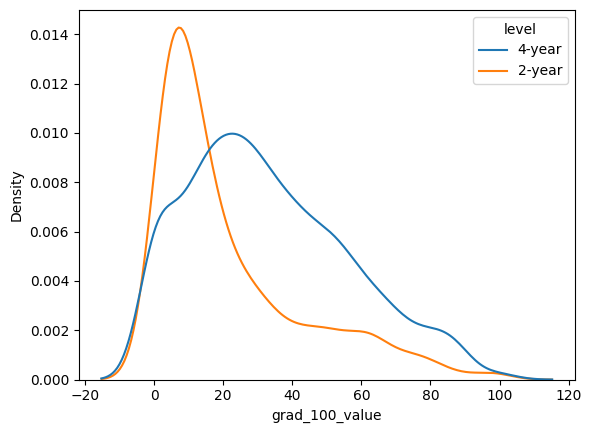

In [22]:
#5.1
sns.kdeplot(data, x='grad_100_value', hue='level')

In [23]:
#5.2
data.loc[:,['control','grad_100_value']].groupby('control').describe()

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

In [25]:
#5.3
data.loc[:,['level','grad_100_value']].groupby('level').describe()

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

5. The data shows that 4 year schools have a graduation rate that is 10 poinnts higher than 2 year schools, on average. Looking at the data through the type of school, private not-for-profits have the highest rate at 41%, while for profit and public schools lag behind at 29% and 17.4% respectively. These trends are accurately shown in the above graphs.

<Axes: xlabel='grad_100_value', ylabel='Density'>

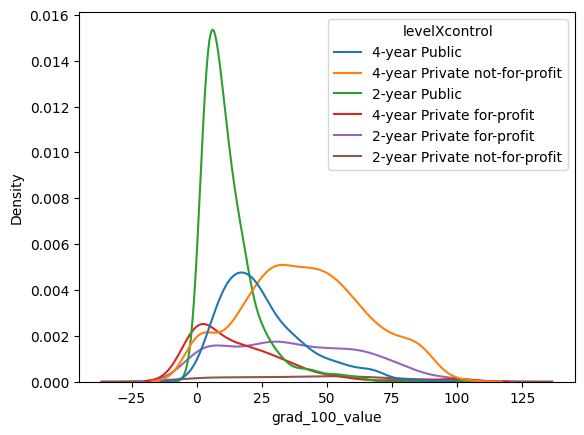

In [27]:
#6
data['levelXcontrol']=data['level']+' '+data['control']
sns.kdeplot(data, x='grad_100_value', hue='levelXcontrol')

6. Going off of the plot, it would appear that 2 year public have the worst graduation rates. The best  performers are private 4 year not-for-profit follow by 2 year for profit programs.

<Axes: xlabel='aid_value', ylabel='Density'>

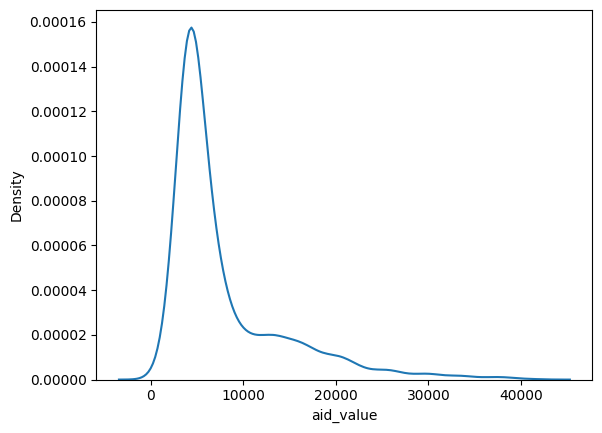

In [28]:
#7
sns.kdeplot(data, x='aid_value')

<Axes: xlabel='aid_value', ylabel='Density'>

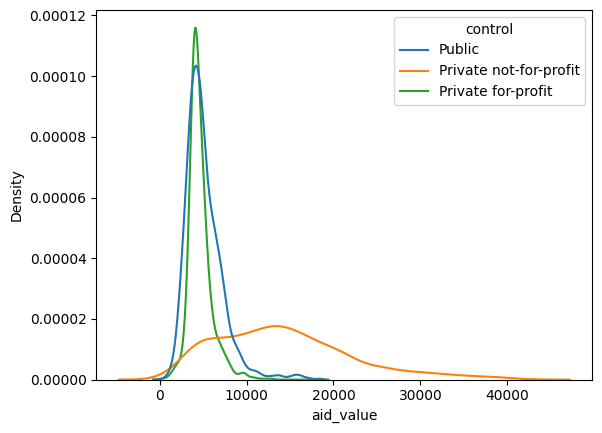

In [29]:
#7.1
sns.kdeplot(data, x='aid_value', hue='control')

<Axes: xlabel='aid_value', ylabel='Density'>

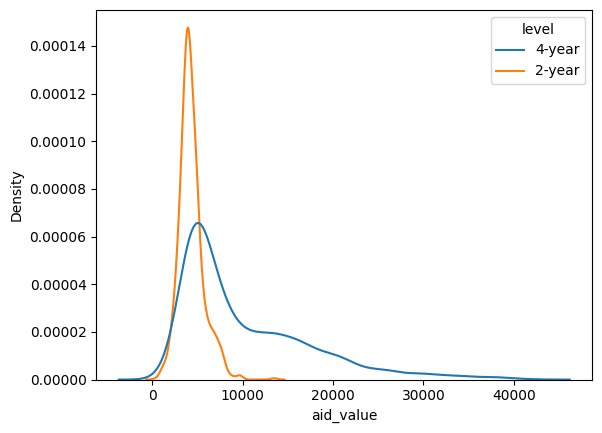

In [30]:
#7.2
sns.kdeplot(data, x='aid_value', hue='level')

In [32]:
#7.3
data.loc[:, ['control', 'aid_value']].groupby('control').describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

In [33]:
#7.4
data.loc[:, ['level', 'aid_value']].groupby('level').describe()

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

7. The second spike in the graph comes from the aid provided by private not for profit schools, as shown in the plot that separates the type of program. These types of programs provide more aid, while the public and for-profit programs are more similar. This difference isn't shown in the level chart given it doesnt divide by the type and tells the predictable concept that 4 year schools give more aid.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

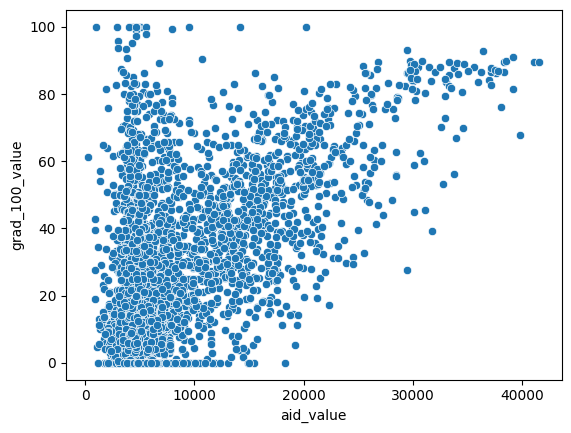

In [36]:
#8
sns.scatterplot(data, x='aid_value', y='grad_100_value')

8 There seems to be a large section where there is a postive relationship between aid_value and grad_100_value. However, there is also a section of data where grad_100_value increases yet aid_value barely removes.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

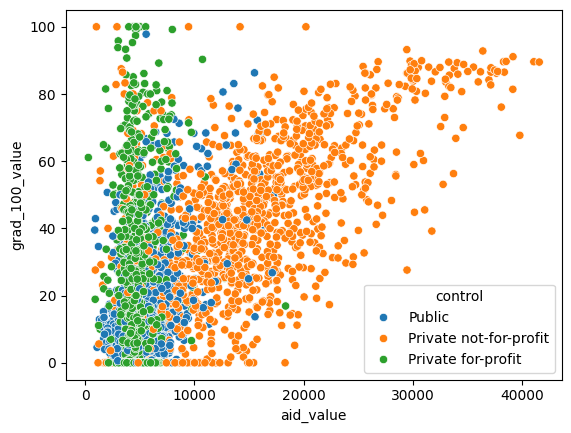

In [39]:
#8.1
sns.scatterplot(data, x='aid_value', y='grad_100_value', hue='control')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

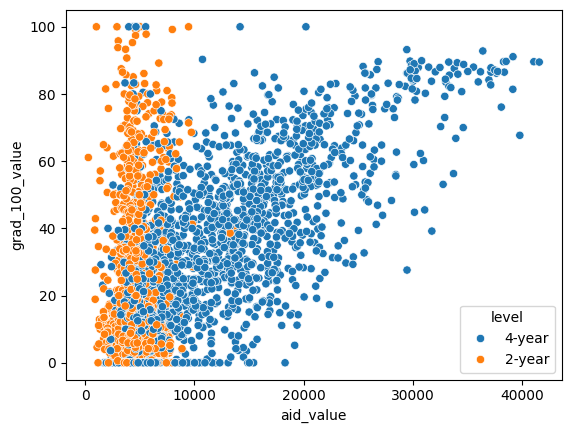

In [40]:
#8.2
sns.scatterplot(data, x='aid_value', y='grad_100_value', hue='level')

8 PT2: Dividing the data by control and level shows that the positive link between aid and grad_100_level is from the not for profit 4 year programs. This is illustrated by looking at both graphs and seeing where the observations fall. The public and private for-profit programs seem to give about the same, likely given their dominacne of 2 year programs compared to not for profit institutions.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [47]:
df = pd.read_csv('/content/puf2021_2_winter.csv',low_memory=False)
df.columns.values.tolist()

['PUF_ID',
 'SURVEYYR',
 'VERSION',
 'ACW_D_ERVIST',
 'ACW_D_OPVIST',
 'ACW_OPDMCOND',
 'ACW_OPDTESTS',
 'ACW_OPDFOLUP',
 'ACW_OPDCHKUP',
 'ACW_OPDRFRL',
 'ACW_OPDSURGY',
 'ACW_OPDPSHOT',
 'ACW_OPDTSHOT',
 'ACW_OPDPMED',
 'ACW_OPDOTHER',
 'ACW_OPDAPPT',
 'ACW_OPDDRTEL',
 'ACW_D_OPAPPT',
 'ACW_DVNEED',
 'ACW_DVNDCOST',
 'ACW_MADVDFRF',
 'ACW_MADVNOEM',
 'ACW_PLACEPAR',
 'ACW_PLACEKND',
 'ACW_PVSPEC',
 'ACW_PLACEMCP',
 'ACW_USUALDOC',
 'ACW_GETUSHOW',
 'ACW_D_GETUS',
 'ACW_ACCOMPUS',
 'ACW_ACCWRITE',
 'ACW_ACCEXPDR',
 'ACW_ACCEXPSP',
 'ACW_ACCASKQS',
 'ACW_ACCTRANS',
 'ACW_ACCAPPTS',
 'ACW_ACCMORAL',
 'ACW_ACCDRIVE',
 'ACW_ACCHELP',
 'ACW_PROVYR',
 'ACW_DOCHLTH',
 'ACW_DOCEASY',
 'ACW_HLTHIDEA',
 'ACW_STHLTHGL',
 'ACW_MTHLTHGL',
 'ACW_USCKEVRY',
 'ACW_USUNWRNG',
 'ACW_ORDRTEST',
 'ACW_TSTFLWUP',
 'ACW_RQSTRSLT',
 'ACW_RSLTEASY',
 'ACW_HLTHSRVC',
 'ACW_GIVEINST',
 'ACW_ANYRX',
 'ACW_TALKRX',
 'ACW_BADRCTN',
 'ACW_CARESPCL',
 'ACW_DRINFRMD',
 'ACW_REMINDDR',
 'ACW_STPMSPCL',
 'ACW_TALKPMS'

2 . For missing values, they have been combines with inapplicable results and assigned a '.' in the codebook. A difficult portion of the data relates to all varaibles coded with 'PUF' given that these are related to weighting the data to enable cross-seasonal analysis. With those aside, everything else is a categorical variable with the corresponding values identified in the codebook. Overall I am satisfied with the codebook, particularly as they created individual ones for each data collection period. This makes navigating the codebook easier than having one master codebook for everything.

3. Intersting variables:

ACW_PROVYR - If provider has been seen in last 12 months

ACW_DOCEASY - If provider explains things clearly

ACW_GIVEINST - If provider gives clear instructions

I chose these variables becuase they relate to the patient-doctor relationship, particuarly if that is a functional relationship. The first variable is a vetting variable, allowing for clarity on if people are going to their doctor each year. The other two relate more to how well communication is going between the patient and doctor. Failing to communicate clearly or give instriuctions are two categories that are very important.

In [49]:
df['AV'] = df['ACW_PROVYR']
df['AV'].value_counts()

1    9073
2     884
D      63
Name: AV, dtype: int64

In [54]:
df['AV'] = df['AV'].replace(['2', 'D'], 'No Visit')
df['AV'] = df['AV'].replace('1', 'Visited')
#Makes Data easier to understand and removes simplifies those that cannot remember into having likely not visited

In [55]:
df['AV'].value_counts()

Visited     9073
No Visit     947
Name: AV, dtype: int64

In [63]:
df['Easy'] = df['ACW_DOCEASY']
df['Easy'].value_counts()

4    7381
3    1061
2     473
1     120
D      36
R       2
Name: Easy, dtype: int64

In [64]:
df['Easy'] = df['Easy'].replace(['D', 'R'], 'Invalid Answer')
df['Easy'] = df['Easy'].replace(['4','3'], "Acceptably")
df['Easy'] = df['Easy'].replace(['1','2'], 'Unacceptably')
#This divides the responses into if there was an acceptable amount of easy to understand communication
#In this case, usually or always is considered acceptable while sometimes or never is unacceptable.
#This is done since the point of this analysis is to assess the patient experience

In [65]:
df['Easy'].value_counts()

Acceptably        8442
Unacceptably       593
Invalid Answer      38
Name: Easy, dtype: int64

In [59]:
df['SimpleInst'] = df['ACW_GIVEINST']
df['SimpleInst'].value_counts()

1    5328
2    3668
D      75
R       2
Name: SimpleInst, dtype: int64

In [67]:
df['SimpleInst'] = df['SimpleInst'].replace(['D', 'R', '.'], "Invalid Answer")
df['SimpleInst'] = df['SimpleInst'].replace(['1'], "Yes")
df['SimpleInst'] = df['SimpleInst'].replace(['2'], "No")
#Transform cateogrial identifiers into understandable labels
#Also lump the invalid answers into one categories for ease of understanding

In [68]:
df["SimpleInst"].value_counts()

Yes               5328
No                3668
Invalid Answer      77
Name: SimpleInst, dtype: int64

<Axes: >

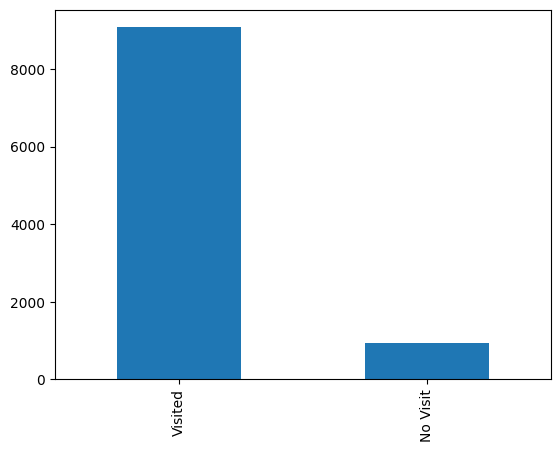

In [83]:
df["AV"].value_counts().plot.bar()

<Axes: >

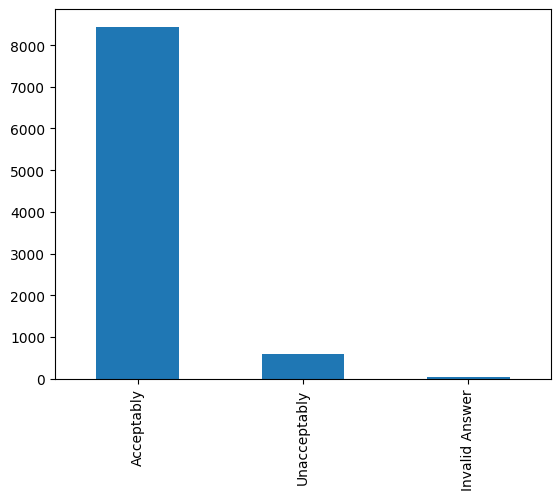

In [84]:
df["Easy"].value_counts().plot.bar()

<Axes: >

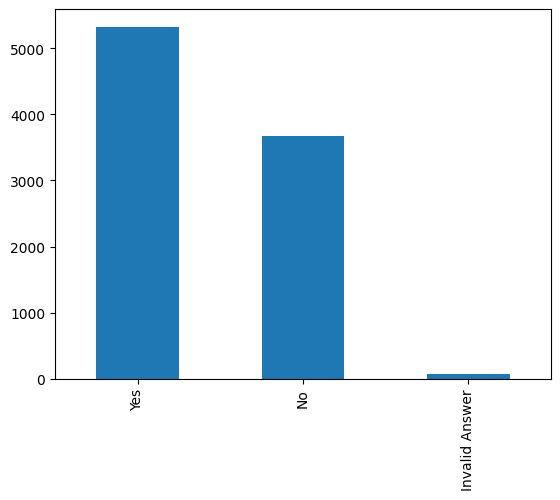

In [85]:
df["SimpleInst"].value_counts().plot.bar()

4. Given the categorial nature of these, there aren't any outliers after the cleaning process.

<Axes: xlabel='AV', ylabel='Count'>

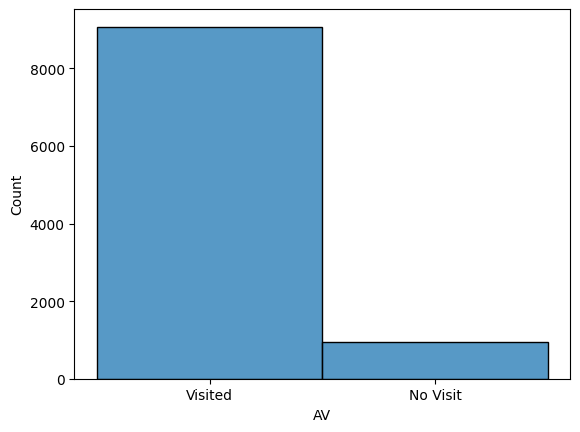

In [96]:
sns.histplot(data=df, x='AV')

<Axes: xlabel='Easy', ylabel='Count'>

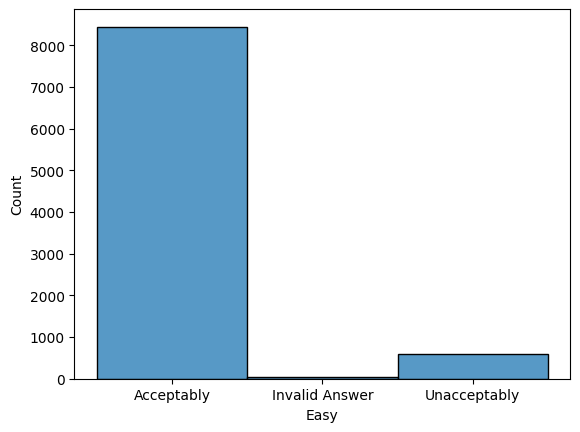

In [97]:
sns.histplot(data=df, x='Easy')

<Axes: xlabel='SimpleInst', ylabel='Count'>

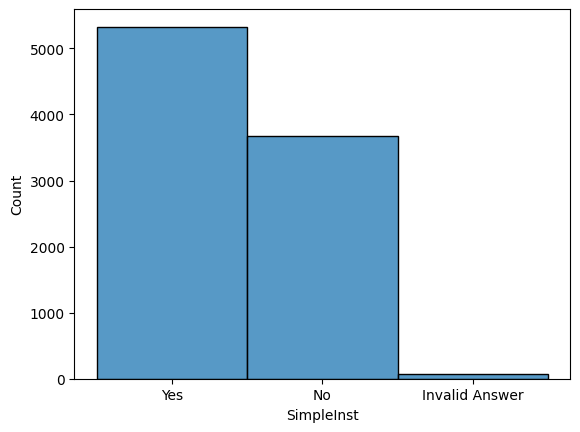

In [98]:
sns.histplot(data=df, x='SimpleInst')

In [ ]:
#I think these are easy to understand histograms of the chosen variables

<Axes: xlabel='SimpleInst', ylabel='Easy'>

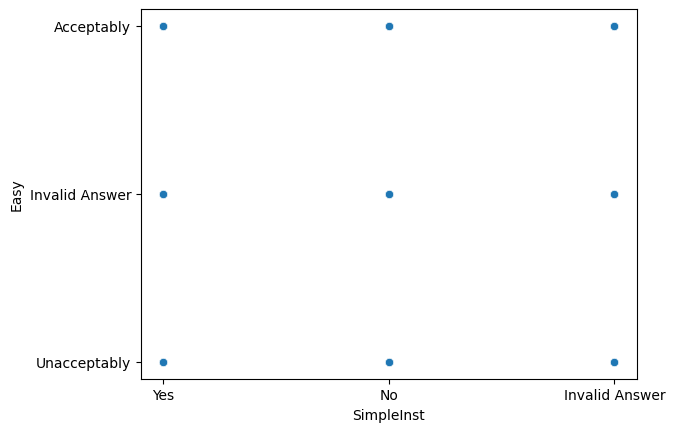

In [99]:
sns.scatterplot(data=df, x='SimpleInst', y='Easy')

Truthfully I think this is a terrible dataset for this type of analysis given that it revolves exclusivelt around categorical variable information. This is more a representation that the code works and would be functional given a numerical variable.

In [103]:
df.loc[:,['Easy','SimpleInst']].groupby('Easy').describe()

SimpleInst                  
                    count unique  top  freq
Easy                                       
Acceptably           8442      3  Yes  5086
Invalid Answer         38      3   No    21
Unacceptably          593      3   No   352

Again this is a bad data slection for this type of analysis these are cleaned categorical variables. Just proof that the code is functional